In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
runblock_df = pd.read_csv("Resources/OT_runblock.csv")
runblock_df.head()

,player,player_id,position,team_name,player_game_count,declined_penalties,franchise_id,gap_grades_run_block,gap_run_block_percent,gap_snap_counts_run_block,...,grades_run_block,penalties,run_block_percent,snap_counts_run_block,snap_counts_run_play,zone_grades_run_block,zone_run_block_percent,zone_snap_counts_run_block,zone_snap_counts_run_block_percent,zone_snap_counts_run_play
0,Daniel Faalele,81734,G,BLT,10,0,3,46.8,100.0,123,...,56.7,2,100.0,301,301,60.7,100.0,143,47.5,143
1,Ronnie Stanley,10640,T,BLT,10,0,3,57.4,100.0,122,...,68.2,3,100.0,295,295,66.4,100.0,141,47.8,141
2,Tyler Linderbaum,82291,C,BLT,10,0,3,76.2,100.0,122,...,90.1,1,100.0,295,295,90.8,100.0,141,47.8,141
3,Cam Jurgens,84014,C,PHI,9,0,24,57.3,100.0,92,...,65.2,1,100.0,293,293,72.4,100.0,146,49.8,146
4,Patrick Mekari,46219,G,BLT,10,0,3,62.5,100.0,119,...,64.9,4,100.0,290,290,63.1,100.0,138,47.6,138


In [6]:
passblock_df = pd.read_csv("Resources/OT_Passblock.csv")
passblock_df.head()

In [7]:
cleaned_passblock = passblock_df.loc[passblock_df['position'].isin(['T'])]
cleaned_passblock.dtypes

player                              object
player_id                            int64
position                            object
team_name                           object
player_game_count                    int64
block_percent                      float64
declined_penalties                   int64
franchise_id                         int64
grades_offense                     float64
grades_pass_block                  float64
grades_run_block                   float64
hits_allowed                         int64
hurries_allowed                      int64
non_spike_pass_block                 int64
non_spike_pass_block_percentage    float64
pass_block_percent                 float64
pbe                                float64
penalties                            int64
pressures_allowed                    int64
sacks_allowed                        int64
snap_counts_block                    int64
snap_counts_ce                       int64
snap_counts_lg                       int64
snap_counts

In [8]:
cleaned_runblock = runblock_df[runblock_df['position'].isin(['T'])]
cleaned_runblock.head()

In [9]:
cleaned_runblock.dtypes

In [10]:
snap_passblock = cleaned_passblock.loc[cleaned_passblock['true_pass_set_snap_counts_pass_block'] > 30]
snap_passblock

KeyError: 'true_pass_set_snap_counts_pass_block'

In [8]:
snap_runblock = cleaned_runblock.loc[cleaned_runblock['snap_counts_run_play'] > 30]
snap_runblock

,player,player_id,position,team_name,player_game_count,declined_penalties,franchise_id,gap_grades_run_block,gap_run_block_percent,gap_snap_counts_run_block,...,grades_run_block,penalties,run_block_percent,snap_counts_run_block,snap_counts_run_play,zone_grades_run_block,zone_run_block_percent,zone_snap_counts_run_block,zone_snap_counts_run_block_percent,zone_snap_counts_run_play
1,Ronnie Stanley,10640,T,BLT,10,0,3,57.4,100.0,122,...,68.2,3,100.0,295,295,66.4,100.0,141,47.8,141
5,Dan Moore Jr.,60120,T,PIT,9,0,25,73.9,100.0,86,...,68.4,0,100.0,287,287,64.0,100.0,174,60.6,174
8,Penei Sewell,81788,T,DET,9,0,11,75.3,100.0,87,...,90.8,0,100.0,275,275,90.4,100.0,164,59.6,164
11,Rasheed Walker,81798,T,GB,9,0,12,57.0,100.0,110,...,45.6,3,100.0,273,273,43.3,100.0,144,52.7,144
12,Zach Tom,55443,T,GB,9,0,12,64.8,100.0,110,...,84.6,0,100.0,272,272,92.0,100.0,143,52.6,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Matt Goncalves,99680,T,IND,3,0,14,73.2,100.0,16,...,80.7,0,100.0,38,38,81.4,100.0,17,44.7,17
510,Larry Borom,59879,T,CHI,2,0,6,40.4,100.0,24,...,40.5,0,100.0,38,38,49.5,100.0,10,26.3,10
518,Asim Richards,99674,T,DAL,5,0,9,52.4,100.0,13,...,47.4,0,100.0,35,35,46.9,100.0,12,34.3,12
525,Evan Neal,99063,T,NYG,1,0,21,61.7,100.0,8,...,93.4,0,100.0,32,32,95.7,100.0,20,62.5,20


In [9]:
merged_df = pd.merge(snap_runblock, snap_passblock, on='player')
merged_df.dtypes

player                                            object
player_id_x                                        int64
position_x                                        object
team_name_x                                       object
player_game_count_x                                int64
declined_penalties_x                               int64
franchise_id_x                                     int64
gap_grades_run_block                             float64
gap_run_block_percent                            float64
gap_snap_counts_run_block                          int64
gap_snap_counts_run_block_percent                float64
gap_snap_counts_run_play                           int64
grades_run_block                                 float64
penalties_x                                        int64
run_block_percent                                float64
snap_counts_run_block                              int64
snap_counts_run_play                               int64
zone_grades_run_block          

In [ ]:
#make a databse with icon font into a json, compare to raw data of teams, if teams match, then put in icon
# color code for each team in matplotlib, can put initials instead of full names,

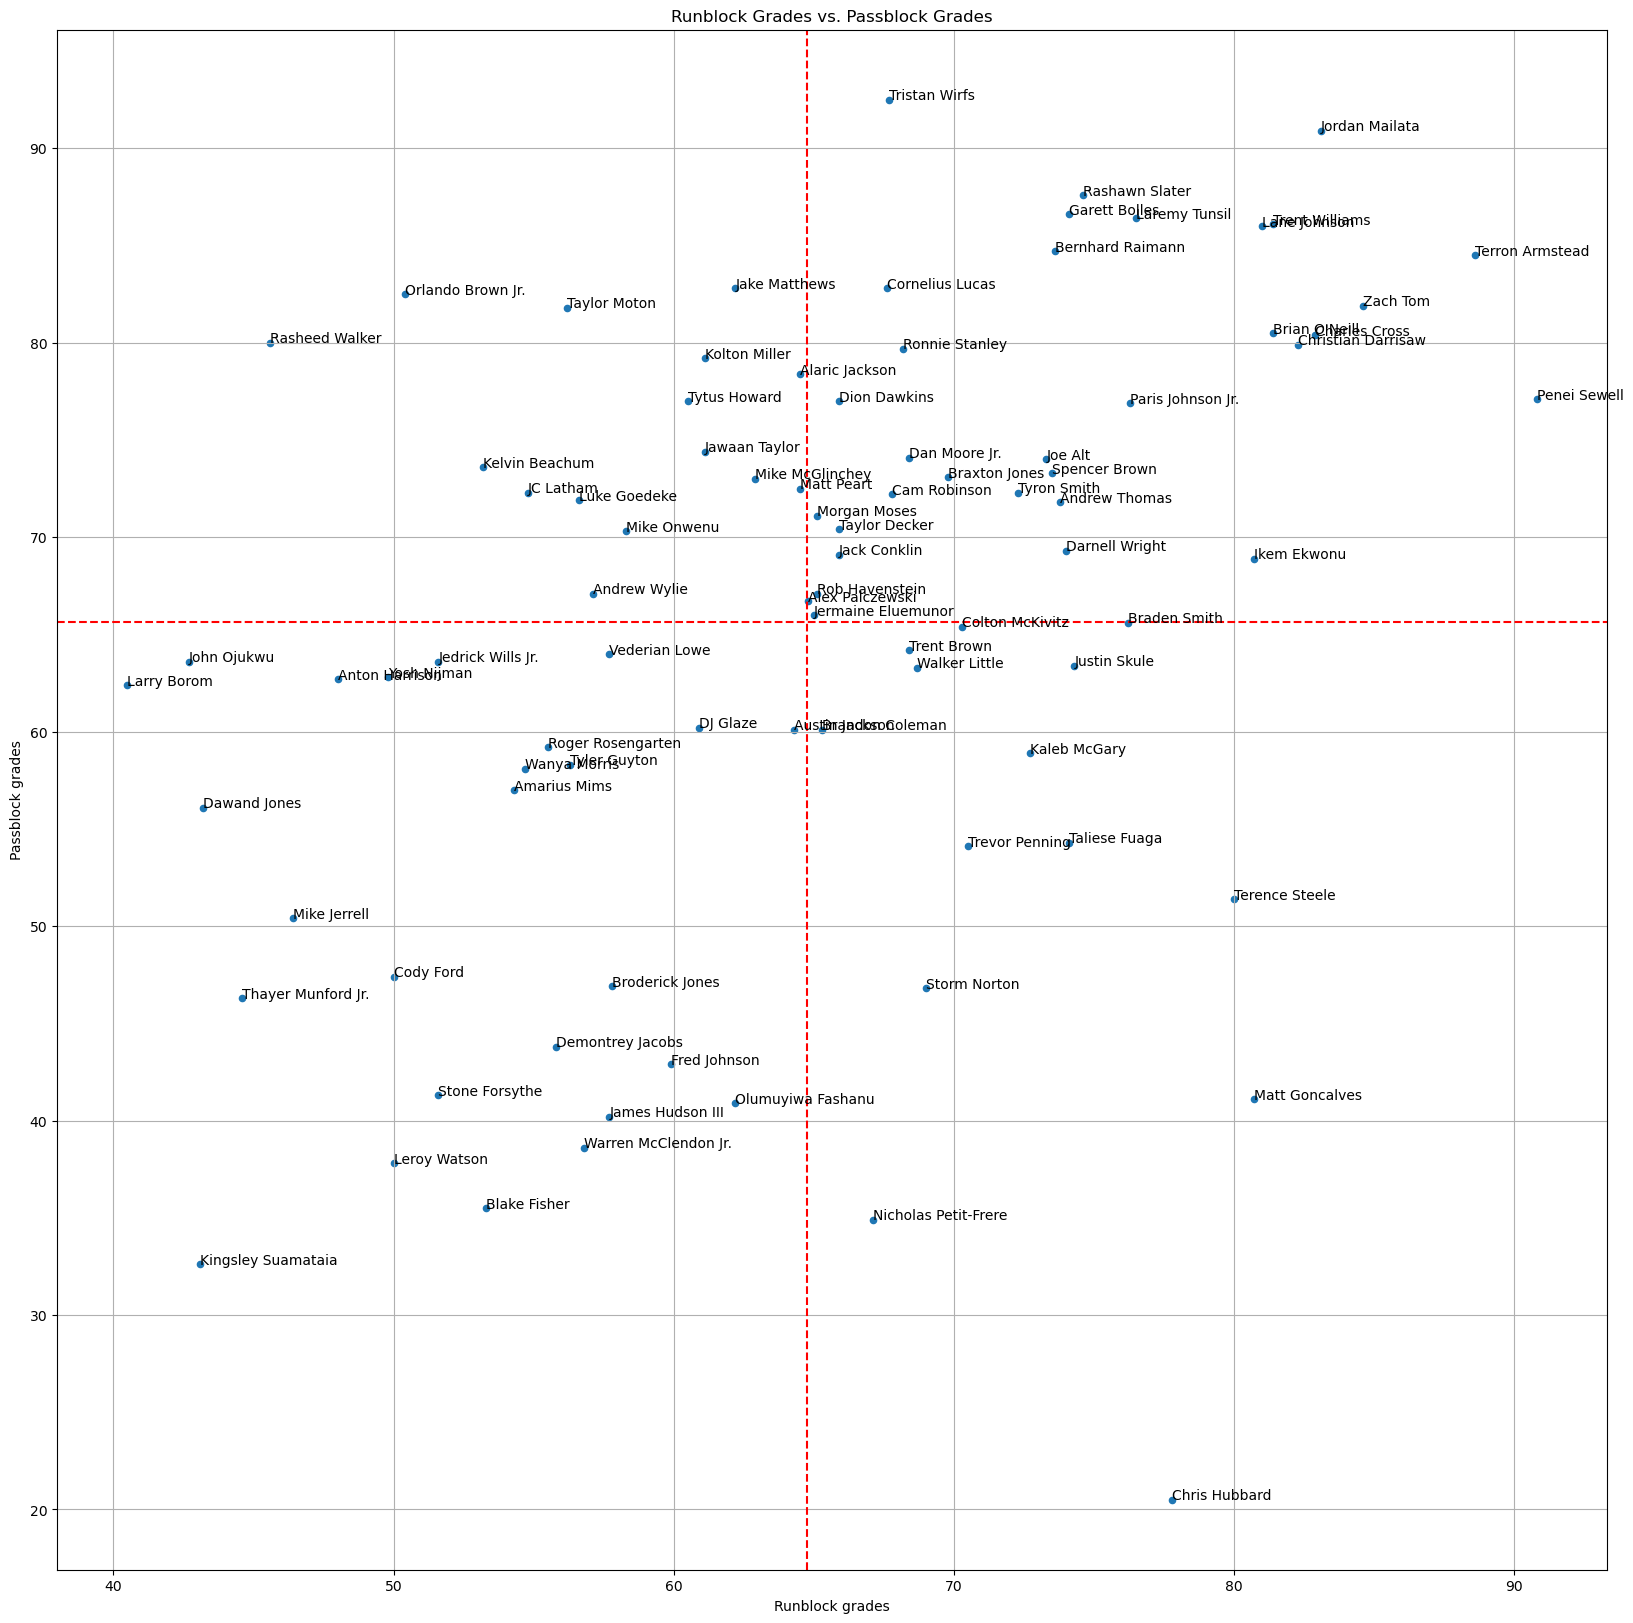

In [10]:
# Create the scatter plot
ax = merged_df.plot(kind='scatter',
                    x='grades_run_block',
                    y='grades_pass_block',
                    grid=True,
                    figsize=(20,20),
                    title='Runblock Grades vs. Passblock Grades')

# Label Axis
plt.xlabel('Runblock grades')
plt.ylabel('Passblock grades')

# Calculate the mean values of x and y
mean_x = np.mean(merged_df['grades_run_block'])
mean_y = np.mean(merged_df['grades_pass_block'])

# Draw the horizontal and vertical lines
plt.axhline(y=mean_y, color='red', linestyle='--')
plt.axvline(x=mean_x, color='red', linestyle='--')


# Annotate each point with its corresponding label
for i, row in merged_df.iterrows():
    ax.annotate(row['player'], (row['grades_run_block'], row['grades_pass_block']), fontsize=10, ha='left')

# Save image
plt.savefig("Graphs/OT.png")

plt.show()

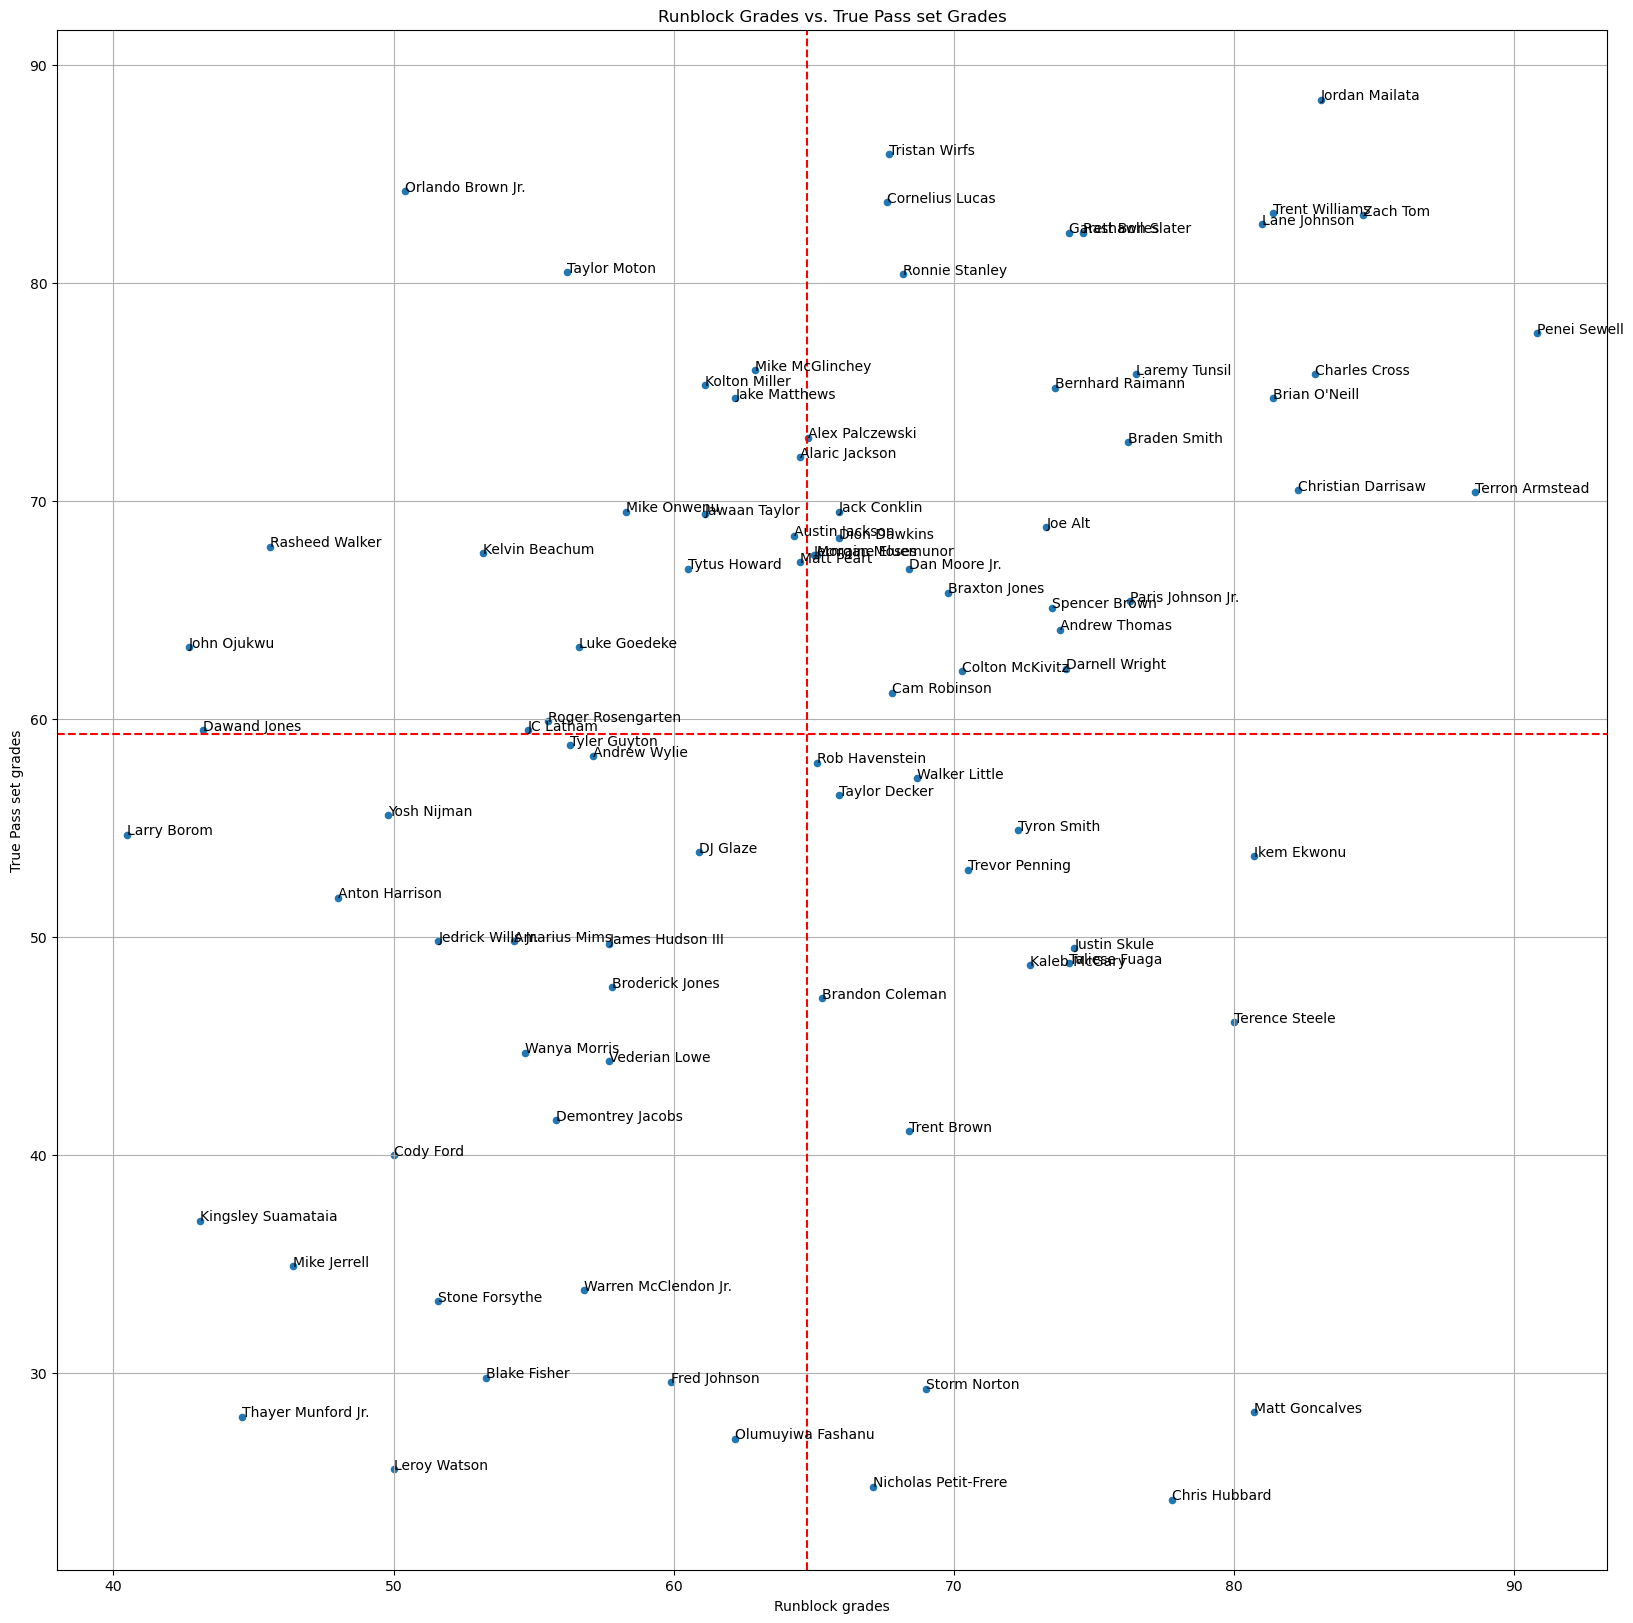

In [11]:
# Create the scatter plot
ax = merged_df.plot(kind='scatter', x='grades_run_block', y='true_pass_set_grades_pass_block', grid=True, figsize=(20,20), title='Runblock Grades vs. True Pass set Grades')

# Label Axis
plt.xlabel('Runblock grades')
plt.ylabel('True Pass set grades')

# Calculate the mean values of x and y
mean_x = np.mean(merged_df['grades_run_block'])
mean_y = np.mean(merged_df['true_pass_set_grades_pass_block'])

# Draw the horizontal and vertical lines
plt.axhline(y=mean_y, color='red', linestyle='--')
plt.axvline(x=mean_x, color='red', linestyle='--')


# Annotate each point with its corresponding label
for i, row in merged_df.iterrows():
    ax.annotate(row['player'], (row['grades_run_block'], row['true_pass_set_grades_pass_block']), fontsize=10, ha='left')

# Save image
plt.savefig("Graphs/OT_true.png")

plt.show()